## Библиотеки

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
from IPython.display import display

## Создание таблиц данных

In [4]:
df = pd.read_csv('C:/Users/User/Desktop/jupyter/IPR/Datasets/DowJones_2018-2023_daily_data.csv', delimiter = ';')

In [5]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"May 26, 2023","32,795.50","33,162.06","32,795.50","33,093.34","33,093.34","330,290,000"
1,"May 25, 2023","32,854.26","32,870.43","32,586.56","32,764.65","32,764.65","364,670,000"
2,"May 24, 2023","33,021.76","33,031.75","32,752.44","32,799.92","32,799.92","246,180,000"
3,"May 23, 2023","33,190.60","33,310.17","33,013.29","33,055.51","33,055.51","291,550,000"
4,"May 22, 2023","33,408.54","33,512.30","33,207.85","33,286.58","33,286.58","268,900,000"


In [6]:
df.rename(columns={'Close*': 'Close', 'Adj Close**': 'Adj Close'}, inplace=True)
df = df.drop(columns=['Adj Close', 'Volume'])
df = df.reindex(columns = ['Date', 'Open', 'Low', 'High', 'Close'])
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,Open,Low,High,Close
0,2023-05-26,"32,795.50","32,795.50","33,162.06","33,093.34"
1,2023-05-25,"32,854.26","32,586.56","32,870.43","32,764.65"
2,2023-05-24,"33,021.76","32,752.44","33,031.75","32,799.92"
3,2023-05-23,"33,190.60","33,013.29","33,310.17","33,055.51"
4,2023-05-22,"33,408.54","33,207.85","33,512.30","33,286.58"


In [8]:
df = df[df['Date'].dt.year.isin([2021, 2022])]
df = df.sort_values(by='Date', ascending=True)
df = df.set_index(['Date'])

for column in ['Open', 'Low', 'High', 'Close']:
    df[column] = df[column].str.replace(',', '').astype(float)

In [9]:
display(df)
df.info()

,Open,Low,High,Close
Date,,,,
2021-01-04,30627.47,29881.82,30674.28,30223.89
2021-01-05,30204.25,30141.78,30504.89,30391.60
2021-01-06,30362.78,30313.07,31022.65,30829.40
2021-01-07,30901.18,30897.86,31193.40,31041.13
2021-01-08,31069.58,30793.27,31140.67,31097.97
...,...,...,...,...
2022-12-23,32961.06,32814.02,33226.14,33203.93
2022-12-27,33224.23,33069.58,33387.72,33241.56
2022-12-28,33264.76,32869.15,33379.55,32875.71


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-01-04 to 2022-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    503 non-null    float64
 1   Low     503 non-null    float64
 2   High    503 non-null    float64
 3   Close   503 non-null    float64
dtypes: float64(4)
memory usage: 19.6 KB


In [10]:
df_stats = pd.DataFrame()
df_stats.index = df.index

#Процентная доходность
df_stats['Returns'] = (df['Close'] / df['Close'].shift(1)) - 1

#Логарифмическая процентная доходность
df_stats['log_Returns'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

#Скользящее среднее для Close
df_stats['MA50'] = df['Close'].rolling(window = 50).mean()

#Волатильность
df_stats['Volatility'] = df_stats['log_Returns'].rolling(window = 7).std()

#Разности последующих значений волатильности
df_stats['diff_Volatility'] = df_stats['Volatility'].diff()

In [11]:
display(df_stats)
df_stats.info()

,Returns,log_Returns,MA50,Volatility,diff_Volatility
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.005549,0.005534,NaN,NaN,NaN
2021-01-06,0.014405,0.014303,NaN,NaN,NaN
2021-01-07,0.006868,0.006844,NaN,NaN,NaN
2021-01-08,0.001831,0.001829,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-23,0.005342,0.005328,32948.1422,0.012524,0.000582
2022-12-27,0.001133,0.001133,33020.2768,0.009112,-0.003413
2022-12-28,-0.011006,-0.011067,33074.0746,0.009556,0.000444


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-01-04 to 2022-12-30
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Returns          502 non-null    float64
 1   log_Returns      502 non-null    float64
 2   MA50             454 non-null    float64
 3   Volatility       496 non-null    float64
 4   diff_Volatility  495 non-null    float64
dtypes: float64(5)
memory usage: 23.6 KB


## Первый взгляд на данные о значении индекса DowJones на закрытии

### *График значений Close по датам*

<AxesSubplot:xlabel='Date', ylabel='Close'>

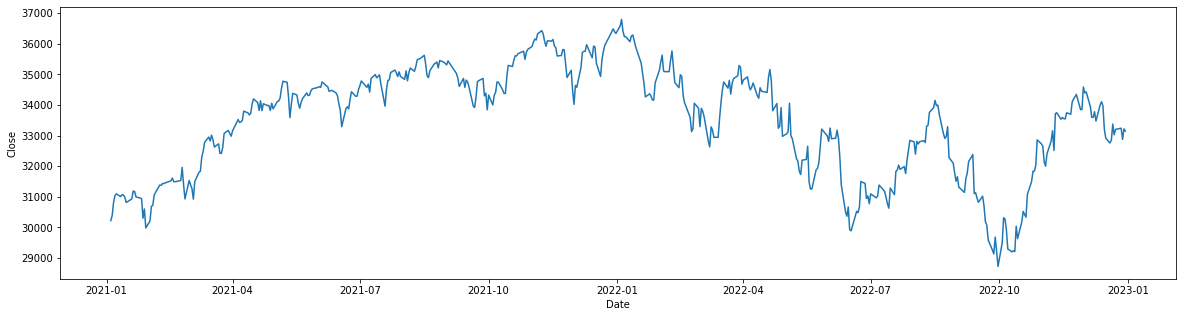

In [12]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df.index,y=df['Close'])

### *График значений Close по датам c графиком скользящего среднего (window=50)*

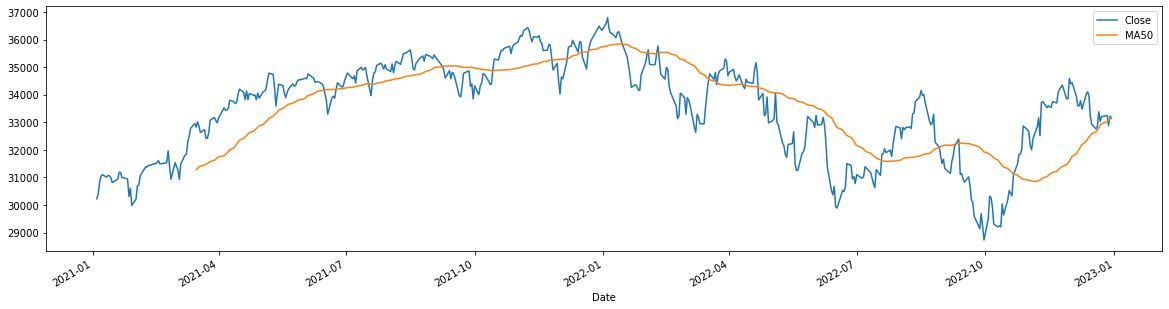

In [13]:
fig = plt.subplots(figsize=(20, 5))
df['Close'].plot(label='Close')
df_stats['MA50'].plot(label='MA50')
plt.legend()
plt.show()

## Анализ данных процентной доходности

### *График значений Процентной доходности(Returns) по датам*

<AxesSubplot:xlabel='Date', ylabel='Returns'>

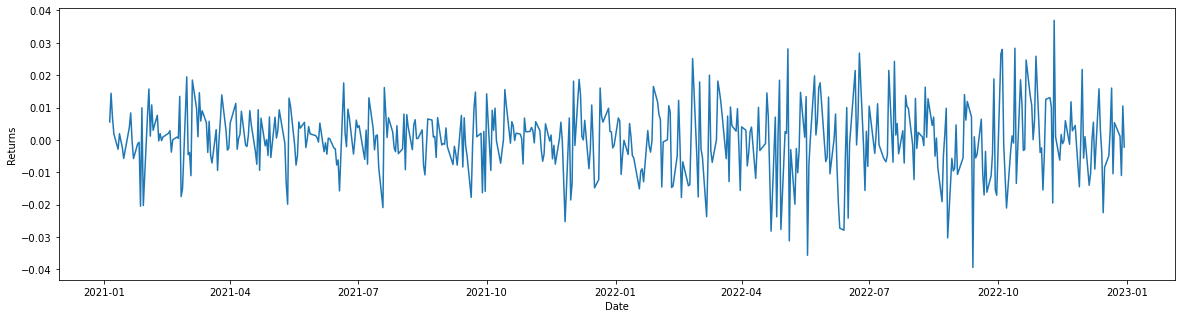

In [14]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df_stats.index,y=df_stats['Returns'])

### *График значений логарифмической Процентной доходности(log_Returns) по датам*

<AxesSubplot:xlabel='Date', ylabel='log_Returns'>

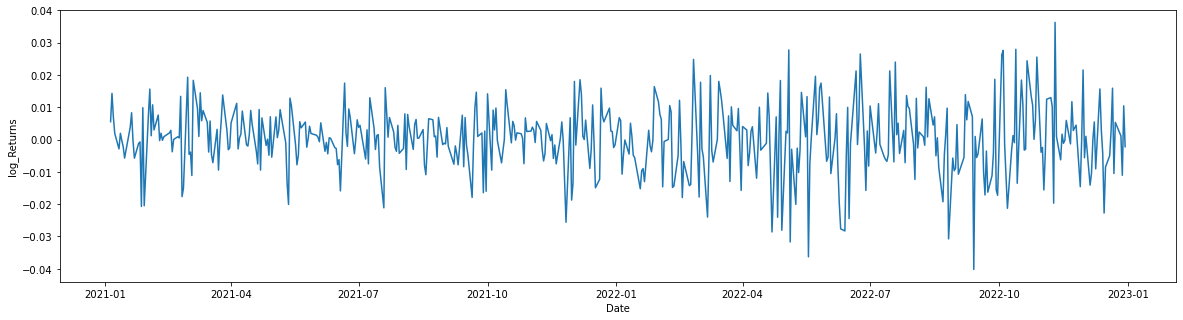

In [15]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df_stats.index,y=df_stats['log_Returns'])

### *Гистограмма и ядерная оценка плотности распределения Процентной доходности(Returns)*

<AxesSubplot:xlabel='Returns', ylabel='Count'>

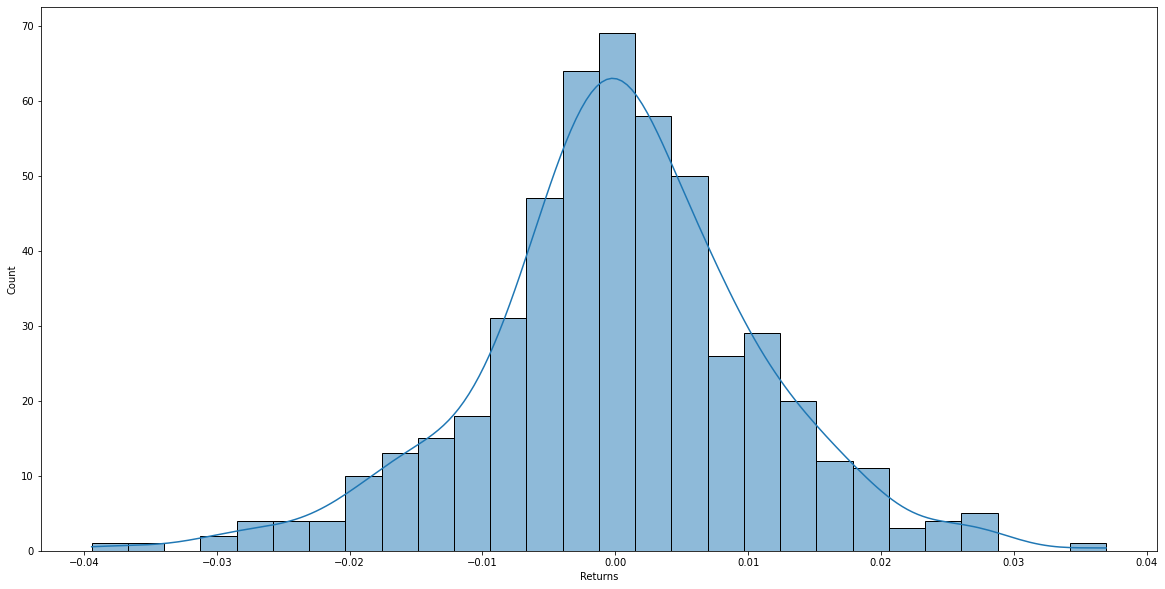

In [16]:
fig = plt.subplots(figsize=(20, 10))
sns.histplot(data=df_stats['Returns'], x=df_stats['Returns'], kde=True)

Проверка ***нулевой гипотезы*** о возможном соответствии распределения *данных* ***логарифмических доходностей*** нормальному распределению

In [17]:
values = df_stats['log_Returns'].dropna().tolist()

result = stats.kstest(values, 'norm')

print(result)

KstestResult(statistic=0.4868601791578635, pvalue=3.7540508077620987e-110)


Исходя из значения **p-value ~ 3.754** и значения отклонения **statistic ~ 0.487** между эмпирической функцией распределения данных и нормальной функцией распределения, можно сделать предположении о соответствии распределения наших данных нормальному


Построим гистограмму ***логарифмической доходности***

### *Гистограмма и ядерная оценка плотности распределения логарифмической Процентной доходности(log_Returns)*

<AxesSubplot:xlabel='log_Returns', ylabel='Count'>

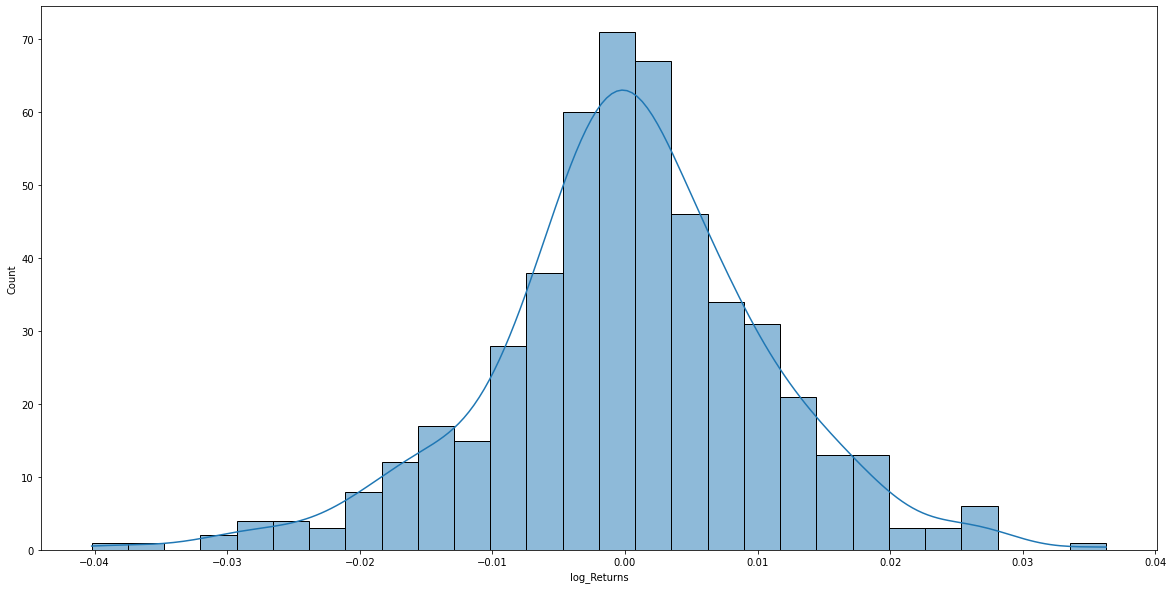

In [18]:
fig = plt.subplots(figsize=(20, 10))
sns.histplot(data=df_stats['log_Returns'], x=df_stats['log_Returns'], kde=True)

Несмотря на некоторые схожести с нормальным распределением, исходя из гистограммы и графика KDE утверждать то, что распределение наших данных соответствует нормальному мы не можем.

<br>
Попробуем рассмотреть, как распределение наших данных соотносится с распределениемя Стьюдента с разными степенями свободы, может это даст нам дополнительную информацию о наших данных.

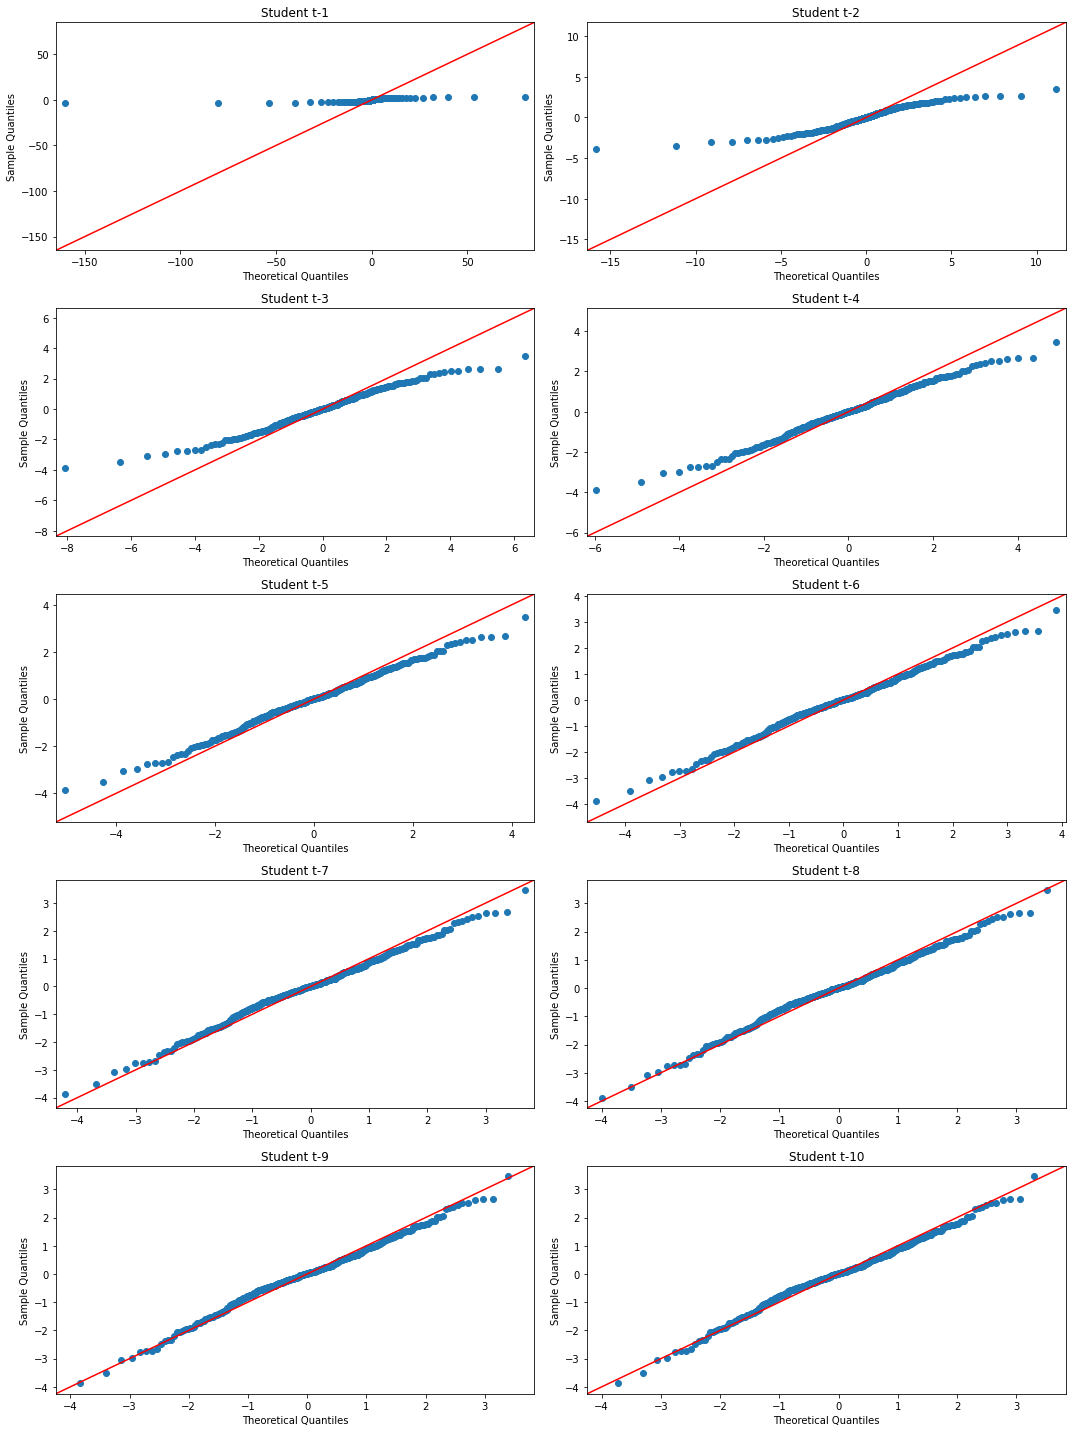

In [19]:
# Получение данных
log_returns_data = df_stats['log_Returns']

# Нормализация данных
normalized_log_returns = (log_returns_data - np.mean(log_returns_data)) / np.std(log_returns_data)

# Создание сетки графиков
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Построение QQ-графиков для различных параметров
for i, ax in enumerate(axes.flatten()):
    if i < 10:
        sm.qqplot(normalized_log_returns, stats.t, distargs=(i+1,), line='45', ax=ax)
        ax.set_title(f'Student t-{i+1}')

# Удаление ненужных пустых графиков
if i < 9:
    for j in range(i+2, 10):
        fig.delaxes(axes.flatten()[j])

# Отображение графиков
plt.tight_layout()
plt.show()

Можем заметить, что график Student t-9(распределение Стьюдента с 9 степенями свободы) показал наилучшее соответствие с нашими данными Логрифмических доходностей.

<br>
Степень свободы в распределении Стьюдента отражает количество независимых наблюдений в данных. Большая степень свободы означает большую точность оценки стандартного отклонения и учет тяжелых хвостов данных. Если график Student t-9 показал наилучшее соответствие, это может означать, что наша выборка имеет тяжелые хвосты и отличается от нормального распределения.

Такое наблюдение может быть важным для принятия решений в финансовой или статистической аналитике. Тк наша выборка  имеет тяжелые хвосты, то использование распределения Стьюдента с 9 степенями свободы может быть более адекватным при оценке рисков и проведении статистических тестов.

<br>
В распределении с тяжелыми хвостами, таком как распределение Стьюдента, экстремальные значения имеют большую вероятность по сравнению с нормальным распределением. Это означает, что в данных есть больше экстремальных или редких событий, чем ожидается по нормальному распределению.

Тяжелые хвосты указывают на наличие более высокой вероятности возникновения крайних событий, таких как большие прибыли или убытки, по сравнению с предполагаемым нормальным распределением.

**>^.^<**

Теперь построим графики ACF и PACF для рассмотрения автокорреляционной функции и частной автокорреляционной функции соответственно для ряда логарифмических доходностей. Делать мы это будем для того, чтобы попробовать обнаружить в данных некую специфику, которая позволит нам лучше подобрать тип модели, которая будет больше подходить для анализа нашего ряда.

Пример: если на графике ACF первый лаг имеет высокое значение, а остальные лаги близки к нулю, это может указывать на сильную автокорреляцию первого порядка (lag 1) в данных.

Автокорреляция первого порядка означает, что значения в текущем периоде сильно коррелируют с значениями в предыдущем периоде. Это может свидетельствовать о наличии тренда или сезонности в данных. 
В таком случае для анализа нашего ряда данных мы можем попробовать воспользоваться моделью AR(1) - авторегрессией первого порядка.


D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


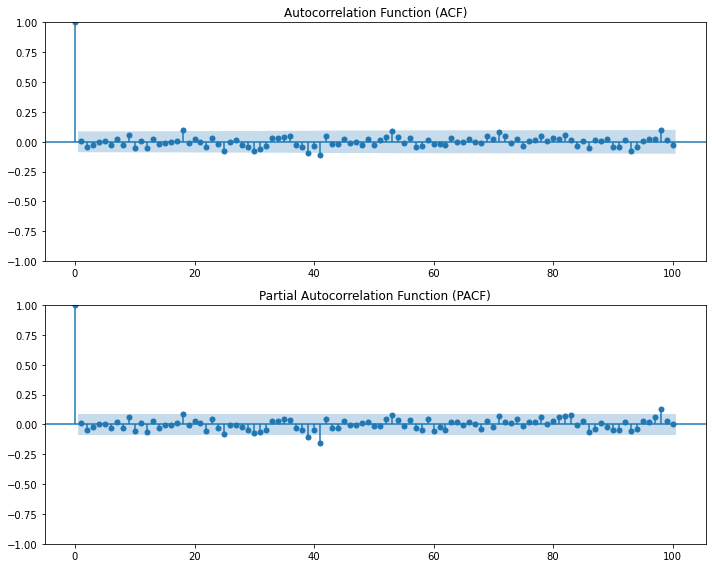

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

values = df_stats['log_Returns'].dropna()

# ACF
sm.graphics.tsa.plot_acf(values, lags=100, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF
sm.graphics.tsa.plot_pacf(values, lags=100, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

При анализе графиков ACF и PACF для ряда логарифмических доходностей, следует обратить внимание на следующие аспекты:

- Значимость корреляций: На графике ACF и PACF обычно присутствуют интервалы значимости (в нашем случае интервал значимсоит ограничен голубой полосой), которые показывают, когда корреляции считаются статистически значимыми. Если автокорреляционная функция или частная автокорреляционная функция выходят за пределы этих интервалов, это может указывать на наличие статистически значимой корреляции.

- Затухание корреляций: нужно обращать внимание на затухание корреляций с увеличением лага. Если корреляции уменьшаются и приходят к нулю с увеличением лага, это может указывать на отсутствие значимых корреляций в данных.

- Значимые лаги: важно обращать внимание на значимые лаги, на которых автокорреляционная функция или частная автокорреляционная функция значительно отличается от нуля или выходит за пределы интервалов значимости. Эти лаги могут указывать на наличие сезонности или структурных изменений в данных.

В нашем случае все лаги кроме нулевого входят в интервал значимости и ни один не выходит за его пределы, что может указывать на отсутствие значимой автокорреляции в данных. В таком случае, можно сделать вывод, что значения ряда на разных временных отрезках не коррелируют между собой.

Отсутствие значимой автокорреляции может быть полезным для моделирования и предсказания, поскольку оно указывает на то, что текущие значения ряда мало зависят от предыдущих значений и возможно легче прогнозировать на основе других факторов или моделей, например таких как модели простого скользящего среднего (Moving Average, MA), модели случайного блуждания (Random Walk) или модели с постоянным прогнозом (Naive Forecast). Эти модели не учитывают автокорреляцию при прогнозировании значений.

## Анализ рисков

Оценка рисков активов на основе значений волатильности является распространенным подходом в финансовом анализе. Волатильность представляет собой меру изменчивости цены актива или доходности инвестиций и может использоваться для оценки потенциальных рисков и возможностей.


Стандартное отклонение является наиболее распространенной мерой волатильности. Чем выше стандартное отклонение, тем больше вариативность цены актива. Высокое стандартное отклонение может указывать на больший риск.


В качестве меры риска будем использовать значения волатильности, расчитанные как стандартное отклонений логарифмической процентнтой доходности со скользящим окном равным 7.

### График значений волатильности(Volatility) по датам

<AxesSubplot:xlabel='Date', ylabel='Volatility'>

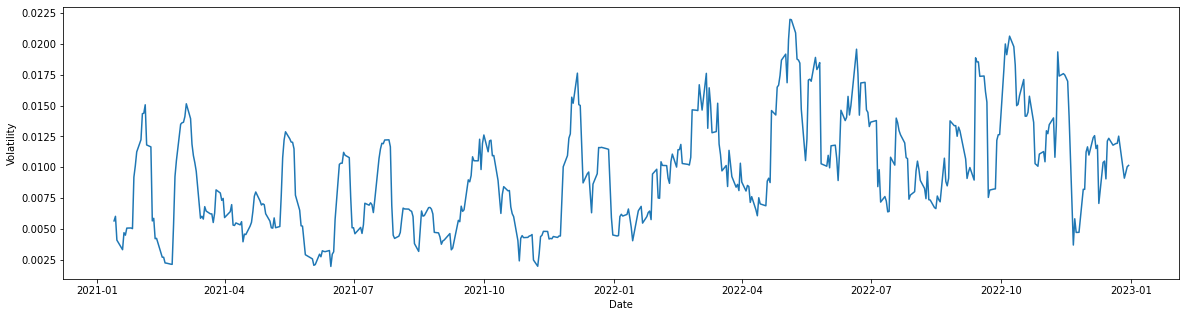

In [21]:
fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df_stats.index,y=df_stats['Volatility'])

Расчитаем соответствующие разности для значений волатильности по каждой паре подряд идущих дней. Возможно это позволит нам заметить некие тренды в изменениях волатильности.

### График разностей значений волатильности(diff_Volatility) по датам

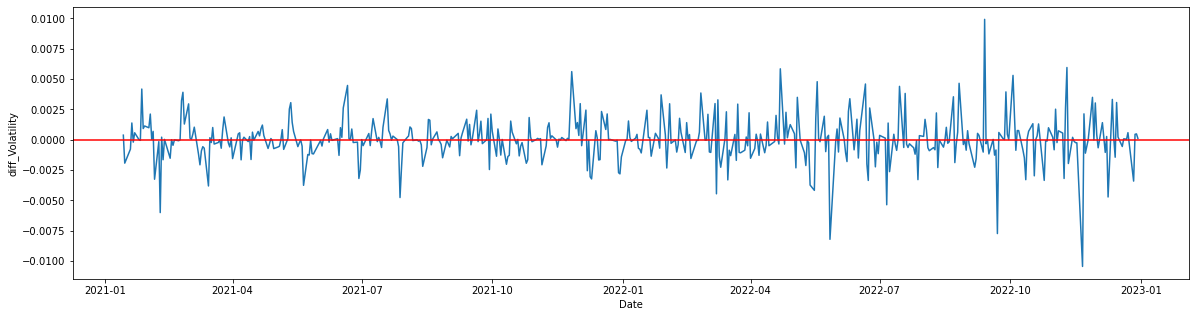

In [22]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=df_stats.index,y=df_stats['diff_Volatility'])
ax.axhline(0, color='red')

### Гистограмма и ядерная оценка плотности распределения волатильности(Volatility)

<AxesSubplot:xlabel='Volatility', ylabel='Count'>

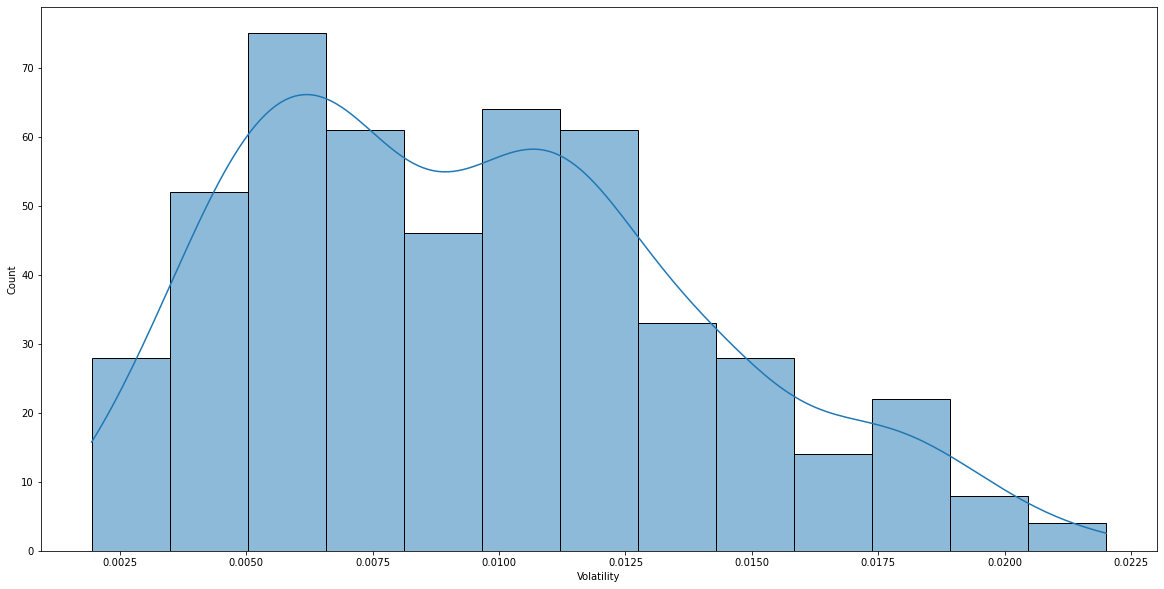

In [23]:
fig = plt.subplots(figsize=(20, 10))
sns.histplot(data=df_stats['Volatility'], x=df_stats['Volatility'], kde=True)

Можем заметить, что наше распределение далеко от нормального, оно скорее похоже на подобие бимодального распределения. Можем сразу отмести проверку нулевой гипотезы с помощью статистического теста Колмогорова-Смирнова на соответствие нормальному распределению.

<br>
Попробуем рассмотреть, как распределение наших данных соотносится с распределениемя Стьюдента с разными степенями свободы, может это даст нам дополнительную информацию о наших данных.

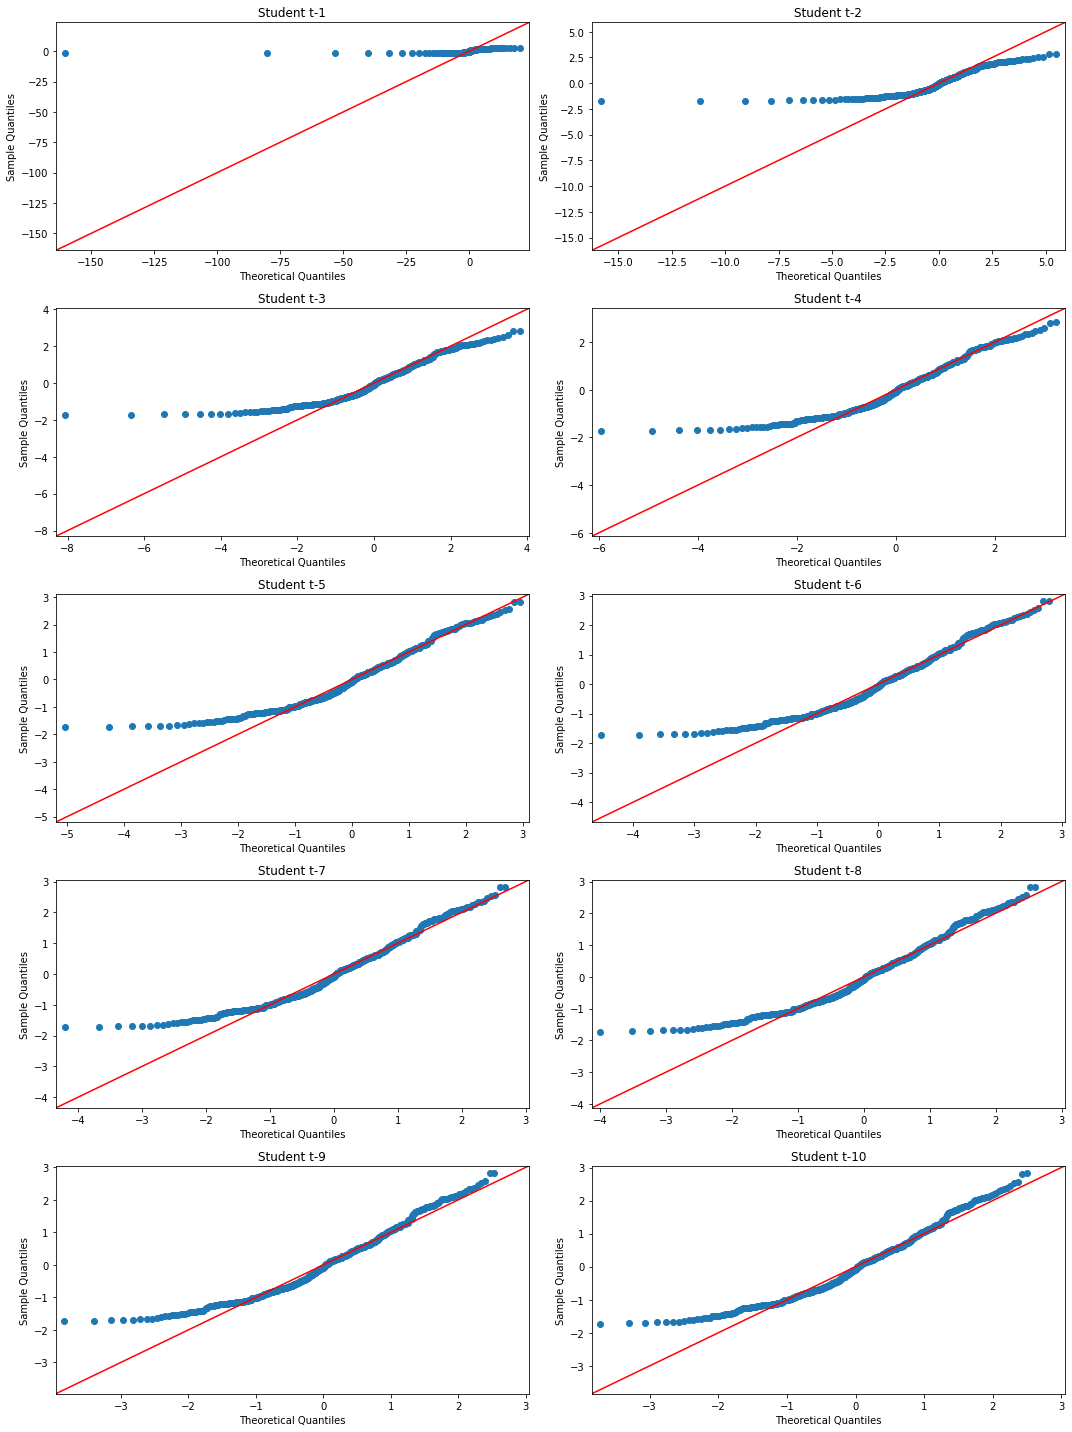

In [24]:
volatility_data = df_stats['Volatility']

# Нормализация данных
normalized_volatility = (volatility_data - np.mean(volatility_data)) / np.std(volatility_data)

# Создание сетки графиков
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Построение QQ-графиков для различных параметров
for i, ax in enumerate(axes.flatten()):
    if i < 10:
        sm.qqplot(normalized_volatility, stats.t, distargs=(i+1,), line='45', ax=ax)
        ax.set_title(f'Student t-{i+1}')

# Удаление ненужных пустых графиков
if i < 9:
    for j in range(i+2, 10):
        fig.delaxes(axes.flatten()[j])

# Отображение графиков
plt.tight_layout()
plt.show()

Результаты не очень утешительные. На распределении Стьюдента мы остановиться не можем. Наши данные ему не соответствуют. Попробуем сопоставить плотность распределения наших данных с плотностью заданного биноминального распределения.

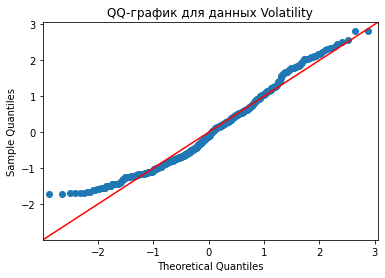

In [25]:
volatility_data = df_stats['Volatility'].dropna().values

# Генерация выборки с бимодальным распределением
sample_bimodal = np.concatenate((np.random.normal(loc=-2, scale=1, size=1000),
                                 np.random.normal(loc=2, scale=1, size=1000)))

# Нормализация данных
normalized_volatility = (volatility_data - np.mean(volatility_data)) / np.std(volatility_data)

# Построение QQ-графика
fig = sm.qqplot(normalized_volatility, line='45')
plt.title('QQ-график для данных Volatility')
plt.show()

Результаты уже лучше, но все еще неутешительные. Попробуем сопоставить плотность распределения наших данных с другими известными плотностями.

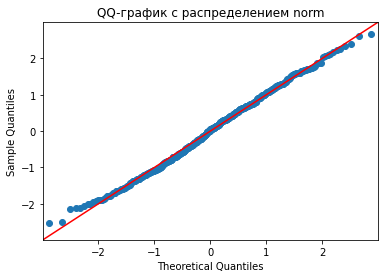

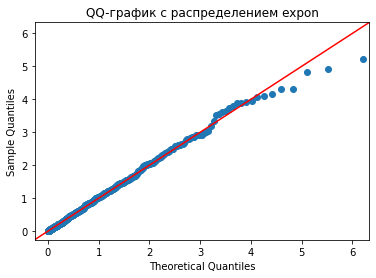

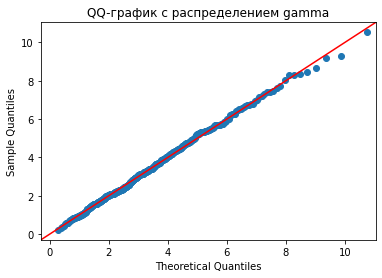

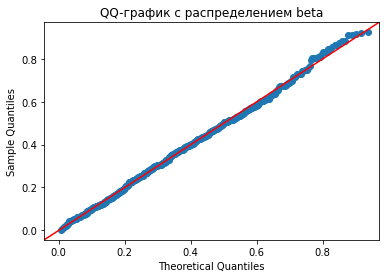

In [26]:
volatility_data = df_stats['Volatility'].dropna().values

# Нормализация данных
normalized_volatility = (volatility_data - np.mean(volatility_data)) / np.std(volatility_data)

# Список распределений для сравнения
distributions = ['norm', 'expon', 'gamma', 'beta']

# Построение QQ-графиков для различных распределений
for distribution in distributions:
    # Получение параметров распределения для вашего данных
    params = getattr(stats, distribution).fit(normalized_volatility)
    
    # Генерация случайных значений с использованием параметров распределения
    fitted_values = getattr(stats, distribution).rvs(*params[:-2], loc=params[-2], scale=params[-1], size=len(normalized_volatility))
    
    # Построение QQ-графика
    fig = sm.qqplot(fitted_values, line='45', dist=getattr(stats, distribution), fit=True)
    plt.title(f'QQ-график с распределением {distribution}')
    plt.show()

Заметим, что распределение наших данных очень похоже на beta-распределение. Оно является наиболее оптимальным и схожим с нашими данными из всех вышерассмотренных вариантов. Остановимся на нем. Теперь при желании мы сможем рассчитать функцию плотности нашего распределения и, например, лучше подобрать модели для прогнозирования данных, зная некоторые особенности распределения наших данных(beta-распределения). Также важно отметить что наше распределение мультимодальное: имеет 2 выраженных пика, что может нам говорить о существовании двух крупных подгрупп данных.

**>^.^<**

Теперь построим графики ACF и PACF для рассмотрения автокорреляционной функции и частной автокорреляционной функции соответственно для ряда логарифмических доходностей. Делать мы это будем для того, чтобы попробовать обнаружить в данных некую специфику, которая позволит нам лучше подобрать тип модели, которая будет больше подходить для анализа нашего ряда.

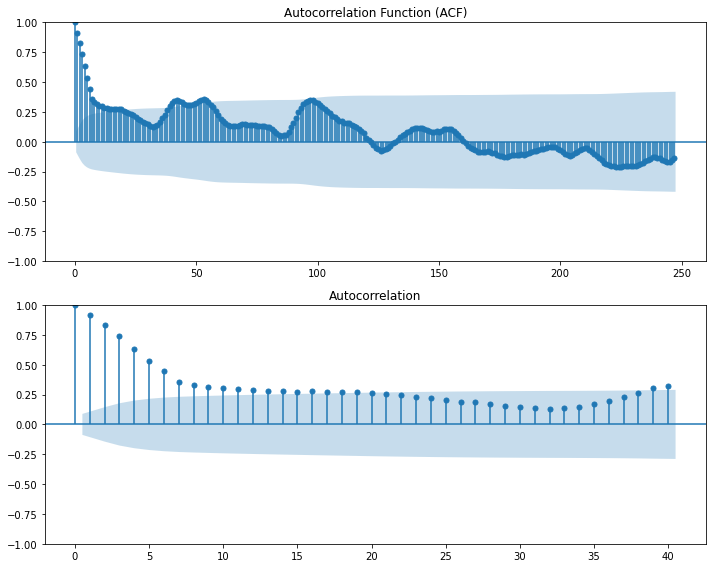

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

values = df_stats['Volatility'].dropna()

# ACF
sm.graphics.tsa.plot_acf(values, lags=247, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

sm.graphics.tsa.plot_acf(values, lags=40, ax=ax2)
ax1.set_title('Autocorrelation Function (ACF)')
# PACF

plt.tight_layout()
plt.show()

На основе графика автокорреляционной функции (ACF) можно сделать следующие выводы:

1. Первые 10 лагов: Первые 10 лагов, имеющие значения, превышающие интервал значимости, указывают на наличие существенной автокорреляции на этих лагах. При этом значения автокорреляции строго убывают, что может указывать на наличие сезонности в данных. Большие значения на начальных лагах могут указывать на сильное влияние предыдущих значений на текущее значение.

2. Следующие 9 лагов: Следующие 9 лагов, находящиеся на границе интервала значимости и имеющие примерно одинаковые значения, указывают на возможное наличие случайной или шумовой автокорреляции на этих лагах. Возможно, на этих лагах нет сильной систематической зависимости или сезонности, но все же наблюдается некоторая связь между значениями.

3. Последующие 13 лагов: Последующие 13 лагов, имеющие значения в пределах интервала значимости и уменьшающиеся по величине, указывают на отсутствие значимой автокорреляции на этих лагах. Это может указывать на то, что предыдущие значения не оказывают существенного влияния на текущие значения на этих лагах.

4. Последующие лаги примерно с 38~ дня по 60~ тоже отклоняются от интервала значимости в сторону единицы, но незначительно. 

5. Дальнейшие отклонения лагов от нуля не выходят за пределы интервала значимости, а значит можно предположить, что существенной автокорреляции там нет

D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
D:\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


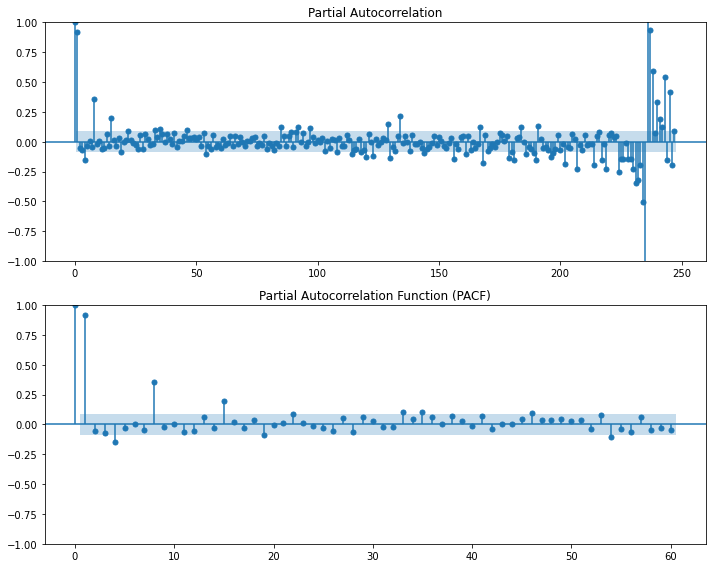

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

values = df_stats['Volatility'].dropna()

# ACF
sm.graphics.tsa.plot_pacf(values, lags=247, ax=ax1)
ax2.set_title('Partial Autocorrelation Function (PACF)')

# PACF
sm.graphics.tsa.plot_pacf(values, lags=60, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

На основе описания графика автокорреляционной функции (PACF) можно сделать следующие выводы:

1. На первых 30~ лагах мы можем говорить о наличии автокорреляции. При этом значения автокорреляции на каждом 7 лаге строго убывают в течение 28 дней, что может указывать на наличие сезонности в данных. Большие значения на начальных лагах могут указывать на сильное влияние предыдущих значений на текущее значение.

2. На лагах с 225~ по 250~ мы также можем говорить о наличии существенной автокорреляции. Появление лагов больше 1 может указывать на появление более сложных зависимостей или циклических паттернов в данных. На более дальних лагах могут проявляться дополнительные взаимосвязи между текущим значением и значениями, которые находятся на нескольких шагах назад. Эти зависимости могут быть обусловлены сезонностью, цикличностью или другими временными паттернами в данных.

## Прогнозирование волатильности Dow Jones

Как можно заметить из проделанного выше анализа, данные о волатильности индекса Dow Jones, которыми мы располагаем, очень неоднородны. Они испытываются влияние огромного количества факторов, в них присутствуют автокоррелляции и сложные для анализа паттерны. Именно поэтому для попытки построения модели для прогноза рисков, мы решили использовать следующий подход:

Идея заключается в том, чтобы искать другие параметры или индексы, которые имеют сильную корреляцию с волатильностью индекса Dow Jones, и использовать их для создания регрессионной модели, которая предсказывает будущую волатильность.

Однако, для того чтобы такой подход был успешным, важно провести тщательный анализ и выбрать подходящие параметры или индексы, которые имеют сильную корреляцию с волатильностью Dow Jones. Корреляция может быть временной и зависеть от конкретных рыночных условий, поэтому необходимо учитывать текущие факторы и внимательно анализировать данные.

**>^.^<**

Для реализации данного подхода сначала нам нужно собрать как можно больше информации для различных индексов, чтобы в дальнейшем искать между ними значимую корреляцию.

### Индекс DowJones

In [29]:
display(df)
display(df_stats)

,Open,Low,High,Close
Date,,,,
2021-01-04,30627.47,29881.82,30674.28,30223.89
2021-01-05,30204.25,30141.78,30504.89,30391.60
2021-01-06,30362.78,30313.07,31022.65,30829.40
2021-01-07,30901.18,30897.86,31193.40,31041.13
2021-01-08,31069.58,30793.27,31140.67,31097.97
...,...,...,...,...
2022-12-23,32961.06,32814.02,33226.14,33203.93
2022-12-27,33224.23,33069.58,33387.72,33241.56
2022-12-28,33264.76,32869.15,33379.55,32875.71


,Returns,log_Returns,MA50,Volatility,diff_Volatility
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.005549,0.005534,NaN,NaN,NaN
2021-01-06,0.014405,0.014303,NaN,NaN,NaN
2021-01-07,0.006868,0.006844,NaN,NaN,NaN
2021-01-08,0.001831,0.001829,NaN,NaN,NaN
...,...,...,...,...,...
2022-12-23,0.005342,0.005328,32948.1422,0.012524,0.000582
2022-12-27,0.001133,0.001133,33020.2768,0.009112,-0.003413
2022-12-28,-0.011006,-0.011067,33074.0746,0.009556,0.000444


### Индекс SP500

In [30]:
df_SP500 = pd.read_csv('C:/Users/User/Desktop/jupyter/IPR/Datasets/S&P500_2018-2023_daily_data.csv', delimiter = ';')

df_SP500.rename(columns={'Close*': 'Close', 'Adj Close**': 'Adj Close'}, inplace=True)
df_SP500 = df_SP500.drop(columns=['Adj Close'])
df_SP500 = df_SP500.reindex(columns = ['Date', 'Open', 'Low', 'High', 'Close'])
df_SP500['Date'] = pd.to_datetime(df_SP500['Date'])

df_SP500 = df_SP500[df_SP500['Date'].dt.year.isin([2021, 2022])]
df_SP500 = df_SP500.sort_values(by='Date', ascending=True)
df_SP500 = df_SP500.set_index(['Date'])

for column in ['Open', 'Low', 'High', 'Close']:
    df_SP500[column] = df_SP500[column].str.replace(',', '').astype(float)  

display(df_SP500)
df_SP500.info()

,Open,Low,High,Close
Date,,,,
2021-01-04,3764.61,3662.71,3769.99,3700.65
2021-01-05,3698.02,3695.07,3737.83,3726.86
2021-01-06,3712.20,3705.34,3783.04,3748.14
2021-01-07,3764.71,3764.71,3811.55,3803.79
2021-01-08,3815.05,3783.60,3826.69,3824.68
...,...,...,...,...
2022-12-23,3815.11,3797.01,3845.80,3844.82
2022-12-27,3843.34,3813.22,3846.65,3829.25
2022-12-28,3829.56,3780.78,3848.32,3783.22


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-01-04 to 2022-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    503 non-null    float64
 1   Low     503 non-null    float64
 2   High    503 non-null    float64
 3   Close   503 non-null    float64
dtypes: float64(4)
memory usage: 19.6 KB


### Индекс NASDAQ

In [31]:
df_NASDAQ = pd.read_csv('C:/Users/User/Desktop/jupyter/IPR/Datasets/NASDAQ.csv', delimiter = ';')

df_NASDAQ = df_NASDAQ.drop(columns=['Adj Close'])
df_NASDAQ = df_NASDAQ.reindex(columns = ['Date', 'Open', 'Low', 'High', 'Close', 'Volume'])
df_NASDAQ['Date'] = pd.to_datetime(df_NASDAQ['Date'])

df_NASDAQ = df_NASDAQ[df_NASDAQ['Date'].dt.year.isin([2021, 2022])]
df_NASDAQ = df_NASDAQ.sort_values(by='Date', ascending=True)
df_NASDAQ = df_NASDAQ.set_index(['Date'])
    
display(df_NASDAQ)
df_NASDAQ.info()

,Open,Low,High,Close,Volume
Date,,,,,
2021-01-04,12958.519531,12543.240234,12958.719727,12698.450195,6636170000
2021-01-05,12665.650391,12665.650391,12828.269531,12818.959961,6971860000
2021-01-06,12666.150391,12649.990234,12909.629883,12740.790039,7689880000
2021-01-07,12867.339844,12867.339844,13090.910156,13067.480469,6841480000
2021-01-08,13160.219727,13036.549805,13208.089844,13201.980469,7289390000
...,...,...,...,...,...
2022-12-23,10437.750000,10361.820313,10514.759766,10497.860352,3544680000
2022-12-27,10462.190430,10340.730469,10472.320313,10353.230469,3827290000
2022-12-28,10339.200195,10207.469727,10414.820313,10213.290039,3842970000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-01-04 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    503 non-null    float64
 1   Low     503 non-null    float64
 2   High    503 non-null    float64
 3   Close   503 non-null    float64
 4   Volume  503 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.6 KB


### Индекс FTSE100

In [32]:
df_FTSE = pd.read_csv('C:/Users/User/Desktop/jupyter/IPR/Datasets/FTSE100.csv', delimiter = ';')


df_FTSE = df_FTSE.reindex(columns = ['Date', 'Open', 'Low', 'High', 'Close'])

df_FTSE['Date'] = pd.to_datetime(df_FTSE['Date'])

df_FTSE = df_FTSE[df_FTSE['Date'].dt.year.isin([2021, 2022])]
df_FTSE = df_FTSE.sort_values(by='Date', ascending=True)
df_FTSE = df_FTSE.set_index(['Date'])

display(df_FTSE)
df_FTSE.info()

,Open,Low,High,Close
Date,,,,
2021-01-04,6460.52,6460.52,6662.66,6571.88
2021-01-05,6571.88,6544.25,6622.77,6612.25
2021-01-06,6612.25,6611.87,6859.14,6841.86
2021-01-07,6841.86,6795.11,6903.61,6856.96
2021-01-08,6856.96,6836.08,6886.34,6873.26
...,...,...,...,...
2022-12-26,7473.01,7473.01,7473.01,7473.01
2022-12-27,7473.01,7473.01,7473.01,7473.01
2022-12-28,7473.01,7473.01,7547.00,7497.19


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509 entries, 2021-01-04 to 2022-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    509 non-null    float64
 1   Low     509 non-null    float64
 2   High    509 non-null    float64
 3   Close   509 non-null    float64
dtypes: float64(4)
memory usage: 19.9 KB


### Создание обещй таблицы с разными индексами для расчета корреляций между ними и волатильностью Dow Jones

Ниже мы создаем новую таблицу, в которую войдут значения доступных нам индексов. Это делается для того, чтобы в дальнейшем построить для данной таблицы матрицу корреляций и обнаружить параметри или индексы, которые сильнее всего коррелируют с нашей целевой переменной - волатильностью индекса Dow Jones.

In [33]:
df_index = pd.DataFrame()
df_index['Volatility'] = df_stats['Volatility']

df_index['SP500_Open'] = df_SP500['Open']
df_index['SP500_Low'] = df_SP500['Low']
df_index['SP500_High'] = df_SP500['High']
df_index['SP500_Close'] = df_SP500['Close']

df_index['NASDAQ_Open'] = df_NASDAQ['Open']
df_index['NASDAQ_Low'] = df_NASDAQ['Low']
df_index['NASDAQ_High'] = df_NASDAQ['High']
df_index['NASDAQ_Close'] = df_NASDAQ['Close']
df_index['NASDAQ_Volume'] = df_NASDAQ['Volume']

df_index['SP500_Open'] = df_SP500['Open']
df_index['SP500_Low'] = df_SP500['Low']
df_index['SP500_High'] = df_SP500['High']
df_index['SP500_Close'] = df_SP500['Close']

df_index['DowJones_Open'] = df['Open']
df_index['DowJones_Low'] = df['Low']
df_index['DowJones_High'] = df['High']
df_index['DowJones_Close'] = df['Close']

df_index['FTSE_Open'] = df_FTSE['Open']
df_index['FTSE_Low'] = df_FTSE['Low']
df_index['FTSE_High'] = df_FTSE['High']
df_index['FTSE_Close'] = df_FTSE['Close']

In [34]:
display(df_index)
df_index.info()

,Volatility,SP500_Open,SP500_Low,SP500_High,SP500_Close,NASDAQ_Open,NASDAQ_Low,NASDAQ_High,NASDAQ_Close,NASDAQ_Volume,DowJones_Open,DowJones_Low,DowJones_High,DowJones_Close,FTSE_Open,FTSE_Low,FTSE_High,FTSE_Close
Date,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,3764.61,3662.71,3769.99,3700.65,12958.519531,12543.240234,12958.719727,12698.450195,6636170000,30627.47,29881.82,30674.28,30223.89,6460.52,6460.52,6662.66,6571.88
2021-01-05,NaN,3698.02,3695.07,3737.83,3726.86,12665.650391,12665.650391,12828.269531,12818.959961,6971860000,30204.25,30141.78,30504.89,30391.60,6571.88,6544.25,6622.77,6612.25
2021-01-06,NaN,3712.20,3705.34,3783.04,3748.14,12666.150391,12649.990234,12909.629883,12740.790039,7689880000,30362.78,30313.07,31022.65,30829.40,6612.25,6611.87,6859.14,6841.86
2021-01-07,NaN,3764.71,3764.71,3811.55,3803.79,12867.339844,12867.339844,13090.910156,13067.480469,6841480000,30901.18,30897.86,31193.40,31041.13,6841.86,6795.11,6903.61,6856.96
2021-01-08,NaN,3815.05,3783.60,3826.69,3824.68,13160.219727,13036.549805,13208.089844,13201.980469,7289390000,31069.58,30793.27,31140.67,31097.97,6856.96,6836.08,6886.34,6873.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.012524,3815.11,3797.01,3845.80,3844.82,10437.750000,10361.820313,10514.759766,10497.860352,3544680000,32961.06,32814.02,33226.14,33203.93,7469.28,7462.80,7496.40,7473.01
2022-12-27,0.009112,3843.34,3813.22,3846.65,3829.25,10462.190430,10340.730469,10472.320313,10353.230469,3827290000,33224.23,33069.58,33387.72,33241.56,7473.01,7473.01,7473.01,7473.01
2022-12-28,0.009556,3829.56,3780.78,3848.32,3783.22,10339.200195,10207.469727,10414.820313,10213.290039,3842970000,33264.76,32869.15,33379.55,32875.71,7473.01,7473.01,7547.00,7497.19


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2021-01-04 to 2022-12-30
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Volatility      496 non-null    float64
 1   SP500_Open      503 non-null    float64
 2   SP500_Low       503 non-null    float64
 3   SP500_High      503 non-null    float64
 4   SP500_Close     503 non-null    float64
 5   NASDAQ_Open     503 non-null    float64
 6   NASDAQ_Low      503 non-null    float64
 7   NASDAQ_High     503 non-null    float64
 8   NASDAQ_Close    503 non-null    float64
 9   NASDAQ_Volume   503 non-null    int64  
 10  DowJones_Open   503 non-null    float64
 11  DowJones_Low    503 non-null    float64
 12  DowJones_High   503 non-null    float64
 13  DowJones_Close  503 non-null    float64
 14  FTSE_Open       494 non-null    float64
 15  FTSE_Low        494 non-null    float64
 16  FTSE_High       494 non-null    float64
 17  FTSE_Close      

### Ниже будет описан алгоритм работы для построения статистической регрессионной модели прогнозирования.
***В тестовом формате алгоритм будет реализован по шагам с визуализацией результатов каждого шага для наглядности. В качестве значения forecast_days - количества дней вперед, на которое мы будем прогноизровать значения волатильности будет выбрано 0. То есть модель будет предсказывать "сегодняшнее значение" волатильности Dow Jones опираясь на доступные индексы.*** 

### Далее будет описна функция, которая на вход принимает значение forecast_days и window - окно, которым мы будем проходиться по нашим данным для нахождения интервала, в котором доступные индексы наиболее коррелировали со значением волатильности Dow Jones.
***Соответственно для демонстрации работы модели прогноза на forecast_days вперед будет использована уже она***

### Смещение значений волатильности на *forecast_days* дней назад(в данном случае на 0)

Это делается для того, чтобы в данных, на которых мы будем обучать модель, сегодняшним значениям доступных индексов соответствовали значения волатильности на forecast_days вперед. То есть если мы хотим построить модель, которая будет давать прогноз на 7 дней вперед, мы задаем значение forecast_days=7. После этого давая на вход модели сегодняшие данные, она вернет прогноз значения волатильности на дату, отстающую от сегодняшней на 7 дней вперед. Таким образом дав на вход модели данные волатильности за последние 7 дней, мы получим прогноз волатильности на ближайшую неделю.

In [35]:
forecast_days = 0

df_corr = df_index.copy()

df_corr['Volatility'] = df_corr['Volatility'].shift(-forecast_days)

In [36]:
df_corr.head(15)

,Volatility,SP500_Open,SP500_Low,SP500_High,SP500_Close,NASDAQ_Open,NASDAQ_Low,NASDAQ_High,NASDAQ_Close,NASDAQ_Volume,DowJones_Open,DowJones_Low,DowJones_High,DowJones_Close,FTSE_Open,FTSE_Low,FTSE_High,FTSE_Close
Date,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,3764.61,3662.71,3769.99,3700.65,12958.519531,12543.240234,12958.719727,12698.450195,6636170000,30627.47,29881.82,30674.28,30223.89,6460.52,6460.52,6662.66,6571.88
2021-01-05,NaN,3698.02,3695.07,3737.83,3726.86,12665.650391,12665.650391,12828.269531,12818.959961,6971860000,30204.25,30141.78,30504.89,30391.60,6571.88,6544.25,6622.77,6612.25
2021-01-06,NaN,3712.20,3705.34,3783.04,3748.14,12666.150391,12649.990234,12909.629883,12740.790039,7689880000,30362.78,30313.07,31022.65,30829.40,6612.25,6611.87,6859.14,6841.86
2021-01-07,NaN,3764.71,3764.71,3811.55,3803.79,12867.339844,12867.339844,13090.910156,13067.480469,6841480000,30901.18,30897.86,31193.40,31041.13,6841.86,6795.11,6903.61,6856.96
2021-01-08,NaN,3815.05,3783.60,3826.69,3824.68,13160.219727,13036.549805,13208.089844,13201.980469,7289390000,31069.58,30793.27,31140.67,31097.97,6856.96,6836.08,6886.34,6873.26
2021-01-11,NaN,3803.14,3789.02,3817.86,3799.61,13048.780273,12999.509766,13138.269531,13036.429688,6960470000,31015.37,30832.06,31096.98,31008.69,6873.26,6768.72,6873.26,6798.48
2021-01-12,NaN,3801.62,3776.51,3810.78,3801.19,13062.059570,12963.919922,13105.040039,13072.429688,7264070000,31015.01,30888.76,31114.56,31068.69,6798.48,6738.21,6816.65,6754.11
2021-01-13,0.005641,3802.23,3791.50,3820.96,3809.84,13088.009766,13051.059570,13171.150391,13128.950195,7104810000,31084.88,30992.05,31153.37,31060.47,6754.11,6736.01,6772.57,6745.52
2021-01-14,0.006016,3814.98,3792.86,3823.60,3795.54,13174.750000,13098.410156,13220.160156,13112.639648,6734100000,31085.67,30982.24,31223.78,30991.52,6745.52,6736.78,6801.96,6801.96


### Проходимся окном 60 дней, чтобы понять в какие 2 месяца значения доступных индексов коррелировали с волатильностю Dow Jones

Будем искать индексы, которые коррелируют со значением волатильности на интервале в 60 дней. Очевидно, что на фондовой бирже в конкретные моменты времени, некоторые индексы могут коррелировать друг с другом, возможно это будет говорить о наличии реальной зависимости между ними, но так или иначе это все временные тренды, обусловленные скорее всего сложными событиями, которые параллельно происходят в данное время и влияют на значения индексов. Корреляция между индексами может быть результатом общих факторов, которые воздействуют на рынок в целом, таких как экономические события, политические решения или макроэкономические тренды. Однако изучение корреляций на определенных промежутках времени может помочь выявить более четкие зависимости и отразить особенности текущих событий и трендов на рынке. Это может быть полезным для прогнозирования и понимания взаимосвязей между индексами на конкретных временных интервалах. Именно поэтому корреляции между индексами необходимо искать на конкртеных временных интервалах.

In [37]:
results_df = pd.DataFrame(columns=['Correlation'])

# Загрузка исходного датафрейма

# Создание нового датафрейма для хранения результатов
results_df = pd.DataFrame(columns=['Correlation'])

# Проход по исходному датафрейму с окном в 60 строк
for i in range(len(df_corr) - 60 + 1):
    # Выбор текущего окна
    window = df_corr.iloc[i:i+60]

    # Построение корреляционной матрицы для окна
    corr_matrix = window.corr()

    # Нахождение значения с наибольшим абсолютным значением корреляции из первой строки
    max_corr = np.max(np.abs(corr_matrix.iloc[0, 1:]))

    # Добавление значения в новый датафрейм
    results_df.loc[i] = max_corr

# Вывод результата
print(results_df)

     Correlation
0       0.458551
1       0.454929
2       0.457761
3       0.459656
4       0.459992
..           ...
439     0.599440
440     0.626630
441     0.614283
442     0.597692
443     0.580243

[444 rows x 1 columns]


In [38]:
max_index = results_df['Correlation'].idxmax()
print(max_index)

167


На наших данных, со 167 дня по 227, нашлись индексы, которые достаточно сильно коррелировали с нашей целевой переменной. Давайте поподробнее на них взглянем.

In [39]:
print('Наибольшее абсолютное значение корреляции относительно волатильности за данный интервал:', results_df['Correlation'][max_index])

Наибольшее абсолютное значение корреляции относительно волатильности за данный интервал: 0.8323592253892499


### Строим таблицу корреляции для 167-227 дней

In [40]:
data = df_corr.iloc[max_index:max_index+60]
data.head()

,Volatility,SP500_Open,SP500_Low,SP500_High,SP500_Close,NASDAQ_Open,NASDAQ_Low,NASDAQ_High,NASDAQ_Close,NASDAQ_Volume,DowJones_Open,DowJones_Low,DowJones_High,DowJones_Close,FTSE_Open,FTSE_Low,FTSE_High,FTSE_Close
Date,,,,,,,,,,,,,,,,,,
2021-09-01,0.003749,4528.80,4522.02,4537.11,4524.09,15308.980469,15302.110352,15379.500000,15309.379883,4271690000,35387.55,35287.05,35407.37,35312.53,7119.70,7119.70,7187.34,7149.84
2021-09-02,0.004016,4534.48,4524.66,4545.85,4536.95,15358.469727,15285.349609,15380.070313,15331.179688,4050510000,35353.06,35348.48,35475.40,35443.82,7149.84,7129.71,7168.78,7163.90
2021-09-03,0.004093,4532.42,4521.30,4541.45,4535.43,15313.410156,15283.669922,15375.559570,15363.519531,3706990000,35401.73,35269.40,35422.71,35369.09,7163.90,7123.87,7182.23,7138.35
2021-09-07,0.004616,4535.38,4513.00,4535.38,4520.03,15375.980469,15343.280273,15403.440430,15374.330078,4014250000,35373.24,35060.90,35373.24,35100.00,7187.18,7147.94,7187.18,7149.37
2021-09-08,0.003298,4518.09,4493.95,4521.79,4514.07,15360.349609,15206.610352,15360.349609,15286.639648,4131560000,35087.45,34925.61,35175.15,35031.07,7149.37,7061.13,7149.37,7095.53


Выводим по убыванию значения корреляции всех доступных индексов и параметров к волатильности, чтобы понять, какие из них сильнее всего коррелируют с целевой переменной.

In [41]:
correlation_matrix = data.corr()

display(correlation_matrix)

sorted_corr = correlation_matrix.loc['Volatility'].abs().sort_values(ascending=False)

display(sorted_corr)

,Volatility,SP500_Open,SP500_Low,SP500_High,SP500_Close,NASDAQ_Open,NASDAQ_Low,NASDAQ_High,NASDAQ_Close,NASDAQ_Volume,DowJones_Open,DowJones_Low,DowJones_High,DowJones_Close,FTSE_Open,FTSE_Low,FTSE_High,FTSE_Close
Volatility,1.000000,-0.828244,-0.825092,-0.806490,-0.804755,-0.826321,-0.832359,-0.814288,-0.813541,-0.371145,-0.807990,-0.801554,-0.781746,-0.764439,-0.651740,-0.646361,-0.637590,-0.626119
SP500_Open,-0.828244,1.000000,0.988369,0.992166,0.976863,0.978670,0.973626,0.979918,0.966004,0.472710,0.952228,0.932161,0.947574,0.910537,0.835422,0.829799,0.834773,0.797294
SP500_Low,-0.825092,0.988369,1.000000,0.991936,0.991390,0.965683,0.978510,0.972955,0.973887,0.435524,0.948634,0.957820,0.959919,0.943343,0.852980,0.862410,0.862726,0.835563
SP500_High,-0.806490,0.992166,0.991936,1.000000,0.990091,0.970899,0.973235,0.982625,0.974610,0.470712,0.937941,0.934227,0.953019,0.926141,0.844253,0.843521,0.851276,0.818056
SP500_Close,-0.804755,0.976863,0.991390,0.990091,1.000000,0.950590,0.966739,0.966921,0.978564,0.429435,0.933528,0.946118,0.953492,0.952287,0.862593,0.860031,0.864330,0.835312
NASDAQ_Open,-0.826321,0.978670,0.965683,0.970899,0.950590,1.000000,0.988756,0.993692,0.975952,0.426533,0.890809,0.876108,0.892715,0.852690,0.750118,0.747630,0.753254,0.710912
NASDAQ_Low,-0.832359,0.973626,0.978510,0.973235,0.966739,0.988756,1.000000,0.990537,0.990877,0.389482,0.901655,0.901256,0.909550,0.883358,0.779323,0.780301,0.782729,0.744428
NASDAQ_High,-0.814288,0.979918,0.972955,0.982625,0.966921,0.993692,0.990537,1.000000,0.988027,0.428718,0.893017,0.882848,0.902775,0.869032,0.765028,0.759735,0.769557,0.728199
NASDAQ_Close,-0.813541,0.966004,0.973887,0.974610,0.978564,0.975952,0.990877,0.988027,1.000000,0.386588,0.889583,0.892746,0.904359,0.892778,0.786904,0.776934,0.784096,0.742917
NASDAQ_Volume,-0.371145,0.472710,0.435524,0.470712,0.429435,0.426533,0.389482,0.428718,0.386588,1.000000,0.488441,0.448929,0.486912,0.435040,0.431327,0.409830,0.465353,0.395238


Volatility        1.000000
NASDAQ_Low        0.832359
SP500_Open        0.828244
NASDAQ_Open       0.826321
SP500_Low         0.825092
NASDAQ_High       0.814288
NASDAQ_Close      0.813541
DowJones_Open     0.807990
SP500_High        0.806490
SP500_Close       0.804755
DowJones_Low      0.801554
DowJones_High     0.781746
DowJones_Close    0.764439
FTSE_Open         0.651740
FTSE_Low          0.646361
FTSE_High         0.637590
FTSE_Close        0.626119
NASDAQ_Volume     0.371145
Name: Volatility, dtype: float64

In [42]:
max_corr_col = sorted_corr[sorted_corr != 1].index[0]

# Вывод и сохранение названия столбца с наибольшей корреляцией
print("Столбец с наибольшей корреляцией:", max_corr_col)

Столбец с наибольшей корреляцией: NASDAQ_Low


В данном случае это оказался параметр Low индекса NASDAQ. Проверим теорию, что значения волатильности тесно связаны и напрямую зависят от данного параметра.

<br>
Подготовим датафрейм для дальнейшего обучение на его данных регрессионной модели.

In [43]:
new_data = pd.DataFrame()

new_data['y'] = data['Volatility']
new_data['x'] = data[max_corr_col]

new_data.reset_index(drop=True, inplace=True)
new_data = new_data.dropna()

display(new_data)

,y,x
0,0.003749,15302.110352
1,0.004016,15285.349609
2,0.004093,15283.669922
3,0.004616,15343.280273
4,0.003298,15206.610352
5,0.003440,15245.169922
6,0.004001,15111.309570
7,0.005693,15030.849609
8,0.005579,15008.299805
9,0.006839,14984.679688


Определение целевой переменной, разбиение выборки на train и test и обучение модели.

In [44]:
y = new_data.y
x = new_data.drop(['y'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Визуализация прогноза модели на тестовой выборке:

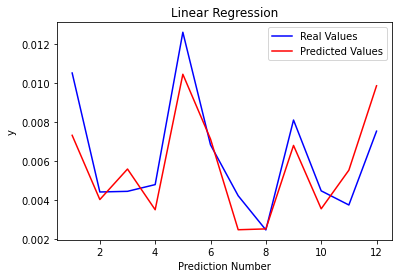

In [45]:
y_pred = model.predict(x_test)

prediction_numbers = np.arange(len(y_pred)) + 1

plt.plot(prediction_numbers, y_test, color='blue', label='Real Values')
plt.plot(prediction_numbers, y_pred, color='red', label='Predicted Values')
plt.xlabel('Prediction Number')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Коэффициент детерминации на train и test обученной модели.

In [46]:
print('train r-squared', model.score(x_train, y_train))
print('test r-squared', model.score(x_test, y_test))

train r-squared 0.6936366648925001
test r-squared 0.6792229895501773


Исходя из результатов работы модели, можно увидеть, что модель достаточно хорошо себя показала, имея возможность предсказывать значения волатильности, и описывая около 70~ процентов дисперсии целевой переменной. Таким образом наш метод при наличии достаточного объема данных и соответствующего анализа может быть применим для прогнозирования значений индексов.

### Функция для построения модели прогнозирования на forecast_days вперед.

In [47]:
def function(forecast_days, window, df_index):
    
    df_corr = df_index.copy()
    df_corr['Volatility'] = df_corr['Volatility'].shift(-forecast_days)
    
    results_df = pd.DataFrame(columns=['Correlation'])

    for i in range(len(df_corr) - window + 1):
        interval = df_corr.iloc[i:(i+window)]
        corr_matrix = interval.corr()
        max_corr = np.max(np.abs(corr_matrix.iloc[0, 1:]))
        results_df.loc[i] = max_corr

    max_index = results_df['Correlation'].idxmax()

    data = df_corr.iloc[max_index:(max_index+window)]

    correlation_matrix = data.corr()

    sorted_corr = correlation_matrix.loc['Volatility'].abs().sort_values(ascending=False)

    max_corr_col = sorted_corr[sorted_corr != 1].index[0]

    new_data = pd.DataFrame()

    new_data['y'] = data['Volatility']
    new_data['x'] = data[max_corr_col]

    new_data.reset_index(drop=True, inplace=True)
    new_data = new_data.dropna()
  
    y = new_data.y
    x = new_data.drop(['y'], axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)

    model = LinearRegression()
    model.fit(x_train, y_train)
 
    y_pred = model.predict(x_test)
    prediction_numbers = np.arange(len(y_pred)) + 1
    plt.plot(prediction_numbers, y_test, color='blue', label='Real Values')
    plt.plot(prediction_numbers, y_pred, color='red', label='Predicted Values')
    plt.xlabel('Prediction Number')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    print('train R-squared', model.score(x_train, y_train))
    print('test R-squared', model.score(x_test, y_test))
    print('\n')
    
    return model

### Проверка работоспособности модели для прогнозирования значений волатильности на 0-10 дней вперед.

Модель прогноза на 1 - days вперед


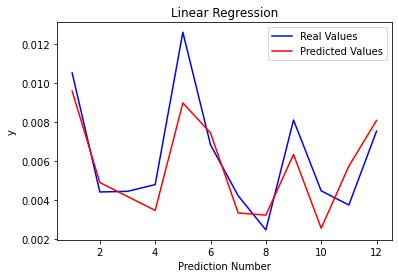

train R-squared 0.6839897831201741
test R-squared 0.7129017318340742


Модель прогноза на 2 - days вперед


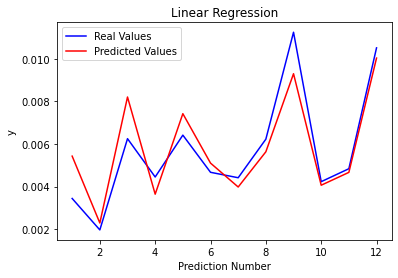

train R-squared 0.7256973469822001
test R-squared 0.8232491587398105


Модель прогноза на 3 - days вперед


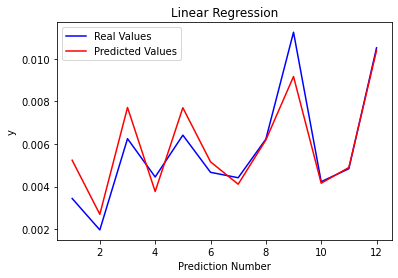

train R-squared 0.7580852988750132
test R-squared 0.8435242379399287




In [48]:
for i in range(1, 4):
    print('Модель прогноза на', i,'- days вперед')
    function(i, 60, df_index)

Модель прогноза на 4 - days вперед


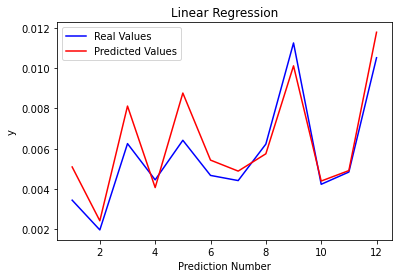

train R-squared 0.7090132374474343
test R-squared 0.8030644996124561


Модель прогноза на 5 - days вперед


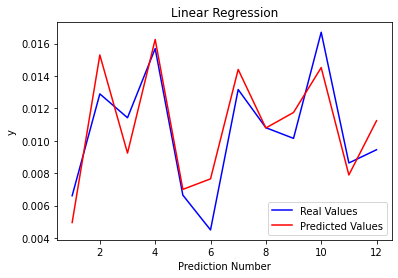

train R-squared 0.609985644951142
test R-squared 0.758071280617136


Модель прогноза на 6 - days вперед


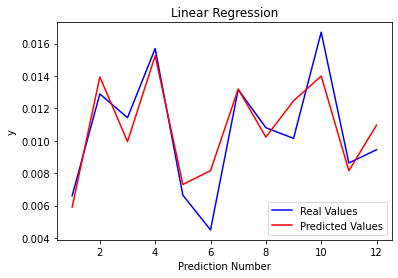

train R-squared 0.5528441137205244
test R-squared 0.7774275029517712


Модель прогноза на 7 - days вперед


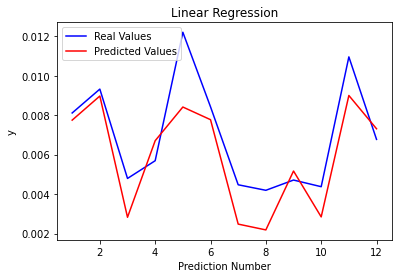

train R-squared 0.5899421355081771
test R-squared 0.5897237926731764




In [49]:
for i in range(4, 8):
    print('Модель прогноза на', i,'- days вперед')
    function(i, 60, df_index)

Модель прогноза на 8 - days вперед


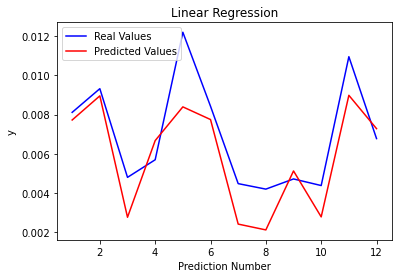

train R-squared 0.5915377633018521
test R-squared 0.5750325069604998


Модель прогноза на 9 - days вперед


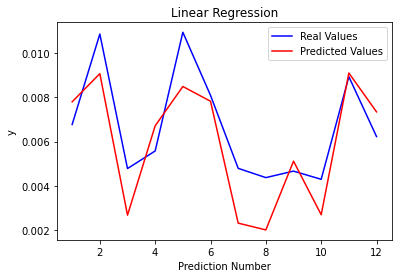

train R-squared 0.5889714078383338
test R-squared 0.5204589071606665


Модель прогноза на 10 - days вперед


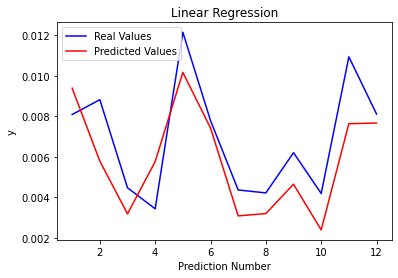

train R-squared 0.5516779586320961
test R-squared 0.5419564670302459




In [50]:
for i in range(8, 11):
    print('Модель прогноза на', i,'- days вперед')
    function(i, 60, df_index)

Чем на большее количество дней мы хотим получить прогноз, тем хуже становится качество модели, что неудивительно, ведь при увеличении интервала, на котором мы прогнозируем данные, изменяется значение корреляции целевой переменной и того параметра, который мы выбираем для построения регрессионной модели. При расширении интервала, ослабляется зависимость между двумя этими параметрами, которую мы обнаружили на временном промежутке фиксированного размера. Однако избрав такой подход и уйдя от формата классической задачи прогнозирования временного ряда, мы избавились от многих сопутствующих такому формату задач проблем, например от накопления ошибки при прогнозировании данных на несколько интервалов(в данном случае дней) вперед. Подход, который мы реализовали, при достаточном количестве данных, может быть разумным, и давать результаты в рамках задачи прогнозирования.